In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
df = pd.read_csv("/content/drive/MyDrive/mobile_data.csv")
df

,Brand,Name,RAM,Processor,Battery,Rear Camera,Front Camera,Display,Launch Date,Operating System,...,USB Type-C,Internal Memory,Expandable Memory,Wi-Fi,Bluetooth,GPS,Audio Jack,SIM Slot(s),Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8 GB,Qualcomm Snapdragon 695,5000 mAh,108 MP + 2 MP + 2 MP,16 MP,6.72 inches (17.07 cm),"April 11, 2023 (Official)",Android v13,...,Yes,128 GB\n ...,"Yes, Up to 1 TB","Yes, Wi-Fi 5 (802.11 a/b/g/n/ac) 5GHz, MIMO","Yes, v5.1","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM",Yes,"Rs. 19,999.00"
1,realme,realme 10 Pro Plus 5G,6 GB,MediaTek Dimensity 1080 MT6877V,5000 mAh,108 MP + 8 MP + 2 MP,16 MP,6.7 inches (17.02 cm),"December 8, 2022 (Official)",Android v13,...,Yes,128 GB\n ...,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz, MIMO","Yes, v5.2","Yes with A-GPS, Glonass",USB Type-C,"Dual SIM, GSM+GSM",Yes,"Rs. 24,818.00"
2,realme,realme Narzo N53,4 GB,Unisoc T612,5000 mAh,50 MP,8 MP,6.74 inches (17.12 cm),"May 22, 2023 (Official)",Android v13,...,Yes,64 GB\n ...,"Yes, Up to 2 TB","Yes, Wi-Fi 5 (802.11 a/b/g/n/ac) 5GHz","Yes, v5.0","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM",Yes,"Rs. 8,999.00"
3,OnePlus,OnePlus 11R,8 GB,Qualcomm Snapdragon 8 Plus Gen 1,5000 mAh,50 MP + 8 MP + 2 MP,16 MP,6.74 inches (17.12 cm),"February 21, 2023 (Official)",Android v13,...,Yes,128 GB\n ...,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz, MIMO","Yes, v5.3","Yes with A-GPS, Glonass",USB Type-C,"Dual SIM, GSM+GSM",Yes,"Rs. 39,999.00"
4,POCO,POCO F5,8 GB,Qualcomm Snapdragon 7 Plus Gen 2,5000 mAh,64 MP + 8 MP + 2 MP,16 MP,6.67 inches (16.94 cm),"May 10, 2023 (Official)",Android v13,...,Yes,256 GB,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz","Yes, v5.3","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM, Dual VoLTE",Yes,"Rs. 29,999.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,BLU,BLU G72 Max,4 GB,MediaTek Helio G37 MT6765,5000 mAh,13 MP,8 MP,6.8 inches (17.27 cm),"June 10, 2023 (Expected)",Android v12,...,Yes,128 GB\n ...,"Yes, Up to 256 GB","Yes, Wi-Fi 5 (802.11 a/b/g/n/ac)","Yes, v5.1",Yes with A-GPS,3.5 mm,"Dual SIM, GSM+GSM",Yes,NaN
1372,Motorola,Motorola Razr 40,8 GB,Qualcomm Snapdragon 7 Gen 1,4200 mAh,64 MP + 13 MP,32 MP,6.9 inches (17.53 cm),"June 30, 2023 (Expected)",Android v13,...,Yes,256 GB,No,"Yes, Wi-Fi 6E (802.11 a/b/g/n/ac/ax) 5GHz 6GHz","Yes, v5.3","Yes with A-GPS, Glonass",USB Type-C,"Dual SIM, GSM+GSM",Yes,NaN
1373,Nubia,Nubia N5,4 GB,Unisoc T700,5000 mAh,50 MP,13 MP,6.51 inches (16.54 cm),"September 20, 2023 (Expected)",Android v13,...,Yes,128 GB\n ...,NaN,"Yes, Wi-Fi 4 (802.11 b/g/n)",Yes,Yes with A-GPS,3.5 mm,"Dual SIM, GSM+GSM",No,NaN
1374,Doogee,Doogee S51,4 GB,MediaTek Helio G25,5180 mAh,12 MP + 2 MP,8 MP,6.0 inches (15.24 cm),"July 28, 2023 (Expected)",Android v12,...,Yes,64 GB\n ...,"Yes, Up to 512 GB","Yes, Wi-Fi 4 (802.11 b/g/n)","Yes, v5.0","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM",Yes,NaN


In [4]:
df.isna().sum()

Brand                     0
Name                      0
RAM                       3
Processor                56
Battery                   1
Rear Camera               0
Front Camera              2
Display                   0
Launch Date               0
Operating System          3
Chipset                  56
Fabrication             219
Graphics                 66
Display Type              1
Pixel Density             0
Screen to Body Ratio    863
Brightness              691
Refresh Rate            549
Capacity                  1
Quick Charging          443
USB Type-C               43
Internal Memory           3
Expandable Memory         8
Wi-Fi                     2
Bluetooth                 0
GPS                       6
Audio Jack                5
SIM Slot(s)               0
Fingerprint Sensor       30
Price                   157
dtype: int64

In [5]:
dfpd = df.copy()
dfpd.shape

(1376, 30)

# Data Cleaning

In [6]:
dfpd.isnull().sum()

Brand                     0
Name                      0
RAM                       3
Processor                56
Battery                   1
Rear Camera               0
Front Camera              2
Display                   0
Launch Date               0
Operating System          3
Chipset                  56
Fabrication             219
Graphics                 66
Display Type              1
Pixel Density             0
Screen to Body Ratio    863
Brightness              691
Refresh Rate            549
Capacity                  1
Quick Charging          443
USB Type-C               43
Internal Memory           3
Expandable Memory         8
Wi-Fi                     2
Bluetooth                 0
GPS                       6
Audio Jack                5
SIM Slot(s)               0
Fingerprint Sensor       30
Price                   157
dtype: int64

## Minimising Null Values

In [7]:
dfpd.drop('Name', axis=1, inplace=True)
dfpd.dropna(subset=['RAM'], inplace=True)
dfpd['Processor'] = dfpd['Processor'].fillna('other')
dfpd.dropna(subset=['Battery'], inplace=True)
dfpd.dropna(subset=['Front Camera'], inplace=True)
dfpd['Operating System'] = dfpd['Operating System'].fillna('Android')
dfpd.drop('Chipset', axis=1, inplace=True)


In [8]:
dfpd.drop('Screen to Body Ratio', axis=1, inplace=True)
dfpd.drop('Brightness', axis=1, inplace=True)
dfpd.drop('Capacity', axis=1, inplace=True)
dfpd.dropna(subset=["Wi-Fi","GPS", "Audio Jack"], inplace=True)
dfpd.dropna(subset=['Display Type'], inplace=True)

In [9]:
dfpd.isnull().sum()

Brand                   0
RAM                     0
Processor               0
Battery                 0
Rear Camera             0
Front Camera            0
Display                 0
Launch Date             0
Operating System        0
Fabrication           209
Graphics               59
Display Type            0
Pixel Density           0
Refresh Rate          537
Quick Charging        432
USB Type-C             36
Internal Memory         0
Expandable Memory       8
Wi-Fi                   0
Bluetooth               0
GPS                     0
Audio Jack              0
SIM Slot(s)             0
Fingerprint Sensor     22
Price                 156
dtype: int64

In [10]:
import re
def extract_numeric_value(value):
    numeric_value = re.findall(r'\d+', value)
    if len(numeric_value) > 0:
        numeric_value = int(numeric_value[0])
        if 'MB' in value:
            numeric_value = int(numeric_value / 1024)
    return numeric_value
dfpd['RAM'] = dfpd['RAM'].apply(extract_numeric_value)

In [11]:
def proc(value):
  temp = value.split()
  return temp[0].strip()
dfpd['Processor'] = dfpd['Processor'].apply(proc)
dfpd['Processor'].unique()

array(['Qualcomm', 'MediaTek', 'Unisoc', 'Samsung', 'Apple', 'Google',
       'HiSilicon', 'other', 'Spreadtrum'], dtype=object)

In [12]:
dfpd['Battery'] = dfpd['Battery'].str.extract('(\d+)', expand=False).astype(int)
# dfpd['Battery'] = np.round(dfpd['Battery'] / 500) * 500
dfpd['Battery'] = dfpd['Battery'].astype(int)
dfpd['Battery'].unique()

array([ 5000,  4500,  4600,  4700,  4980,  4323,  6000,  4820,  4385,
        3279,  3227,  3900,  4800,  4020,  4410,  4810,  5080,  3110,
        4870,  4355,  3700,  2815,  4000,  3200,  4325,  4200,  4830,
        4610,  4400,  4100,  5003,  4614,  5020,  4350,  3095,  4050,
        2227,  4352,  4300,  4520,  3400,  7000,  5160,  3800,  4310,
        2942,  2716,  4015,  3100,  3500,  1821,  4250,  3046,  4025,
        3140,  4680,  3300,  3000,  2915,  5050,  2675,  2018,  4230,
        3969,  3080,  4030,  2800,  4440,  5200,  5065,  3230,  3060,
       10800,  2500,  2515,  9600,  3430,  3315,  3225,  3260,  3055,
        8000,  2730,  2350,  2630,  5300,  5180,  3520,  2000,  2550,
        2300, 10000,  3340,  2100,  4950,  4010,  3360,  1500,  2900,
       12000,  2200,  3050,  2650,  1900,  2600,  3950,  2990,  3030,
        3750,  3020,  2406,  8380,  3687,  2400,  2150,  6600,  6150,
        1800, 10850,  8300,  2050,  2700,  2750,  2820,  2910,  2680,
        5500,  4821,

In [13]:
dfpd['Rear Camera'] = [int(float(i.split('+')[0].strip().split()[0])) for i in dfpd['Rear Camera']]

In [14]:
dfpd['Front Camera'] = [int(float(i.split('+')[0].strip().split()[0])) for i in dfpd['Front Camera']]

In [15]:
import numpy as np
dfpd['Display'] = dfpd['Display'].str.extract(r'([\d.]+)').astype(float)
# dfpd['Display'] = np.round(dfpd['Display'] * 2) / 2

In [16]:
dfpd['Launch Date'] = [int(i.split()[2]) for i in dfpd['Launch Date']]

In [17]:
import re
dfpd['Operating System'] = dfpd['Operating System'].str.extract(r'(Android|iOS)', flags=re.IGNORECASE).fillna('Other')
dfpd['Operating System'].unique()

array(['Android', 'iOS', 'Other'], dtype=object)

In [18]:
import re
def fab(value):
  if value ==None or value =='nan':
    pass
  else:
    fab = re.sub('[^0-9]', '', str(value))
    return fab
dfpd['Fabrication'] = dfpd['Fabrication'].apply(fab)

In [19]:
dfpd['Fabrication'] = dfpd['Fabrication'].replace('',dfpd['Fabrication'].mode()[0]).astype(int)
dfpd['Fabrication'].unique()

array([ 6, 12,  4,  5,  7,  8, 11, 28, 10, 22, 14, 16, 20])

In [20]:
dfpd['Graphics'] = dfpd['Graphics'].str.split(' |-').str[0]

In [21]:
dfpd['Graphics'] = dfpd['Graphics'].fillna(dfpd['Graphics'].mode()[0])
dfpd['Graphics'].unique()

array(['Adreno', 'Mali', 'Apple', 'Immortalis', 'PowerVR', 'IMG'],
      dtype=object)

In [22]:
dfpd['Display Type'] = dfpd['Display Type'].str.lower()
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*amoled.*', 'AMOLED', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*lcd.*', 'LCD', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*tft.*', 'TFT', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*oled.*', 'OLED', regex=True)

dfpd['Display Type'].unique()

array(['LCD', 'AMOLED', 'OLED', 'TFT'], dtype=object)

In [23]:
dfpd['Pixel Density'] = dfpd['Pixel Density'].str.extract('(\d+)', expand=False).astype(int)
# dfpd['Pixel Density'] = (dfpd['Pixel Density'] // 50) * 50
dfpd['Pixel Density'].unique()

array([392, 394, 390, 451, 395, 403, 401, 413, 501, 400, 411, 388, 398,
       409, 526, 460, 521, 405, 431, 402, 457, 422, 269, 453, 268, 407,
       393, 324, 418, 518, 509, 516, 424, 461, 399, 270, 513, 410, 396,
       267, 387, 477, 373, 495, 566, 551, 385, 274, 263, 389, 463, 494,
       465, 326, 426, 404, 531, 444, 415, 514, 568, 439, 278, 524, 456,
       283, 443, 266, 264, 372, 271, 522, 745, 425, 435, 220, 291, 256,
       282, 258, 293, 311, 441, 299, 432, 287, 294, 344, 537, 378, 163,
       218, 257, 273, 252, 295, 337, 233, 197, 310, 196, 247, 285, 312,
       296, 427, 342, 171, 179, 275, 178, 215, 170, 510, 414, 643, 515,
       449, 406, 391, 370, 260, 360, 423, 436, 437, 376, 265])

In [24]:
dfpd['Refresh Rate'] = dfpd['Refresh Rate'].str.extract('(\d+)', expand=False).astype(float).fillna(0).astype(int)
dfpd['Refresh Rate'] = dfpd['Refresh Rate'].replace(0, 60)
dfpd['Refresh Rate'].unique()


array([120,  90,  60, 144, 165])

In [25]:
dfpd['Quick Charging'] = dfpd['Quick Charging'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Quick Charging'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
launch_date_counts = {}
for date in dfpd['Launch Date'].unique():
    count = dfpd.loc[dfpd['Launch Date'] == date, 'USB Type-C'].eq('Yes').sum()
    launch_date_counts[date] = count
launch_date_counts

{2023: 292,
 2022: 308,
 2021: 202,
 2019: 33,
 2020: 81,
 2018: 22,
 2017: 6,
 2016: 1,
 2015: 0,
 2014: 0,
 2013: 0,
 2012: 0}

In [27]:
dfpd.loc[dfpd['USB Type-C'].isnull(), 'USB Type-C'] = np.where(dfpd.loc[dfpd['USB Type-C'].isnull(), 'Launch Date'].astype(str).str[-4:].astype(int) >= 2020, 'Yes', 'No')
dfpd['USB Type-C'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
dfpd['Internal Memory'] = dfpd['Internal Memory'].str.extract(r'(\d+)', expand=False).astype(int)
dfpd['Internal Memory'].unique()

array([128,  64, 256,  32,   1, 512,  16,   8,   4])

In [29]:
dfpd['Expandable Memory'] = dfpd['Expandable Memory'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Expandable Memory'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
dfpd['Wi-Fi'] = dfpd['Wi-Fi'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Wi-Fi'].unique()

array(['Yes'], dtype=object)

In [31]:
dfpd.drop('Wi-Fi', axis=1, inplace=True)

In [32]:
dfpd['Bluetooth'] = dfpd['Bluetooth'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Bluetooth'].unique()

array(['Yes'], dtype=object)

In [33]:
dfpd.drop('Bluetooth', axis=1, inplace=True)

In [34]:
dfpd['GPS'] = dfpd['GPS'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd.drop('GPS', axis=1, inplace=True)

In [35]:
dfpd['Audio Jack'] = dfpd['Audio Jack'].replace('3.5 mm', 'Yes').replace(['USB Type-C', 'Lightning'], 'No')
dfpd['Audio Jack'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:

dfpd['SIM Slot(s)'] = dfpd['SIM Slot(s)'].replace({
    'Dual SIM, GSM+GSM': '2',
    'Dual SIM, GSM+GSM, Dual VoLTE': '2',
    'Single SIM, GSM': '1',
    'Dual SIM, GSM+CDMA': '2'
})

dfpd['SIM Slot(s)'] = dfpd['SIM Slot(s)'].astype(int)
dfpd['SIM Slot(s)'].unique()

array([2, 1])

In [37]:
dfpd['Fingerprint Sensor'] = dfpd['Fingerprint Sensor'].fillna(dfpd['RAM'].apply(lambda x: 'Yes' if x > 6 else 'No'))

In [38]:
dfpd.dropna(subset=['Price'], inplace=True)

In [39]:
dfpd['Price'] = dfpd['Price'].str.replace('Rs. |,|\.[0-9]+', '', regex=True)
dfpd['Price'] = pd.to_numeric(dfpd['Price'], errors='coerce').round(-2).astype('Int64').astype(int)

# dfpd.head()

In [40]:
dfpd.head()

,Brand,RAM,Processor,Battery,Rear Camera,Front Camera,Display,Launch Date,Operating System,Fabrication,...,Pixel Density,Refresh Rate,Quick Charging,USB Type-C,Internal Memory,Expandable Memory,Audio Jack,SIM Slot(s),Fingerprint Sensor,Price
0,OnePlus,8,Qualcomm,5000,108,16,6.72,2023,Android,6,...,392,120,Yes,Yes,128,Yes,Yes,2,Yes,20000
1,realme,6,MediaTek,5000,108,16,6.70,2022,Android,6,...,394,120,Yes,Yes,128,No,No,2,Yes,24800
2,realme,4,Unisoc,5000,50,8,6.74,2023,Android,12,...,390,90,Yes,Yes,64,Yes,Yes,2,Yes,9000
3,OnePlus,8,Qualcomm,5000,50,16,6.74,2023,Android,4,...,451,120,Yes,Yes,128,No,No,2,Yes,40000
4,POCO,8,Qualcomm,5000,64,16,6.67,2023,Android,4,...,395,120,Yes,Yes,256,No,Yes,2,Yes,30000


In [41]:
dfpd.isnull().sum()

Brand                 0
RAM                   0
Processor             0
Battery               0
Rear Camera           0
Front Camera          0
Display               0
Launch Date           0
Operating System      0
Fabrication           0
Graphics              0
Display Type          0
Pixel Density         0
Refresh Rate          0
Quick Charging        0
USB Type-C            0
Internal Memory       0
Expandable Memory     0
Audio Jack            0
SIM Slot(s)           0
Fingerprint Sensor    0
Price                 0
dtype: int64

In [42]:
dfpd.shape

(1207, 22)

In [43]:
dfpd.to_csv('mobile-data-cleaned.csv')

In [44]:
dfpd.describe()

,RAM,Battery,Rear Camera,Front Camera,Display,Launch Date,Fabrication,Pixel Density,Refresh Rate,Internal Memory,SIM Slot(s),Price
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,5.429163,4558.351284,37.542668,13.652858,6.337697,2020.632974,9.986744,353.244408,79.217896,108.528583,1.985087,22500.497100
std,2.721405,1105.652222,29.160043,9.556047,0.505951,2.066556,4.550052,76.626676,25.428430,84.291707,0.121255,23085.907048
min,0.000000,1500.000000,5.000000,0.000000,3.500000,2012.000000,4.000000,163.000000,60.000000,1.000000,1.000000,6000.000000
25%,4.000000,4000.000000,13.000000,8.000000,6.300000,2020.000000,6.000000,270.000000,60.000000,64.000000,2.000000,9700.000000
50%,4.000000,5000.000000,48.000000,12.000000,6.500000,2021.000000,12.000000,395.000000,60.000000,128.000000,2.000000,15000.000000
75%,8.000000,5000.000000,50.000000,16.000000,6.600000,2022.000000,12.000000,403.000000,90.000000,128.000000,2.000000,25000.000000
max,16.000000,12000.000000,200.000000,60.000000,7.850000,2023.000000,28.000000,745.000000,144.000000,512.000000,2.000000,178000.000000


**Label Encoding**

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dfpd['Brand']= label_encoder.fit_transform(dfpd['Brand'])
dfpd['Processor']= label_encoder.fit_transform(dfpd['Processor'])
dfpd['Operating System']= label_encoder.fit_transform(dfpd['Operating System'])
dfpd['Graphics']= label_encoder.fit_transform(dfpd['Graphics'])
dfpd['Display Type']= label_encoder.fit_transform(dfpd['Display Type'])
dfpd['Quick Charging']= label_encoder.fit_transform(dfpd['Quick Charging'])
dfpd['USB Type-C']= label_encoder.fit_transform(dfpd['USB Type-C'])
dfpd['Expandable Memory']= label_encoder.fit_transform(dfpd['Expandable Memory'])
dfpd['Audio Jack']= label_encoder.fit_transform(dfpd['Audio Jack'])
dfpd['Fingerprint Sensor']= label_encoder.fit_transform(dfpd['Fingerprint Sensor'])

In [46]:
dfpd.dtypes

Brand                   int64
RAM                     int64
Processor               int64
Battery                 int64
Rear Camera             int64
Front Camera            int64
Display               float64
Launch Date             int64
Operating System        int64
Fabrication             int64
Graphics                int64
Display Type            int64
Pixel Density           int64
Refresh Rate            int64
Quick Charging          int64
USB Type-C              int64
Internal Memory         int64
Expandable Memory       int64
Audio Jack              int64
SIM Slot(s)             int64
Fingerprint Sensor      int64
Price                   int64
dtype: object

## Data Visualization

<Axes: >

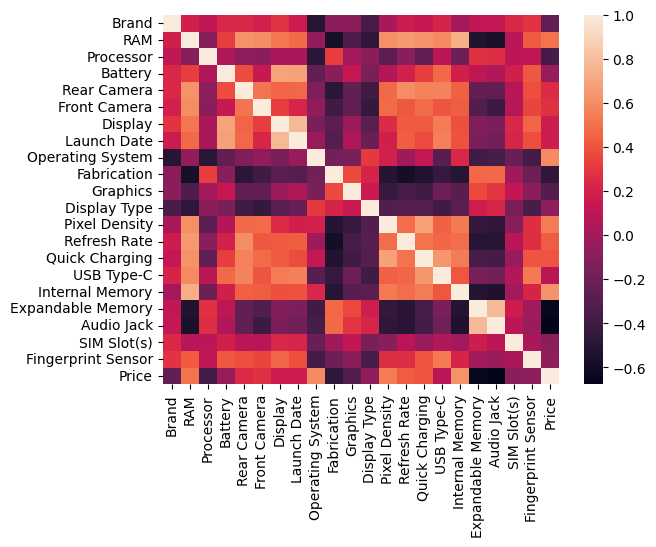

In [47]:
import seaborn as sns
sns.heatmap(dfpd.corr())

<Axes: ylabel='Density'>

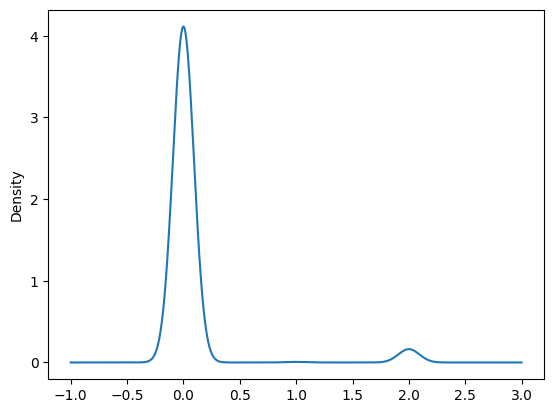

In [48]:
dfpd[dfpd.skew().idxmax()].plot(kind = 'density')

<Axes: ylabel='Density'>

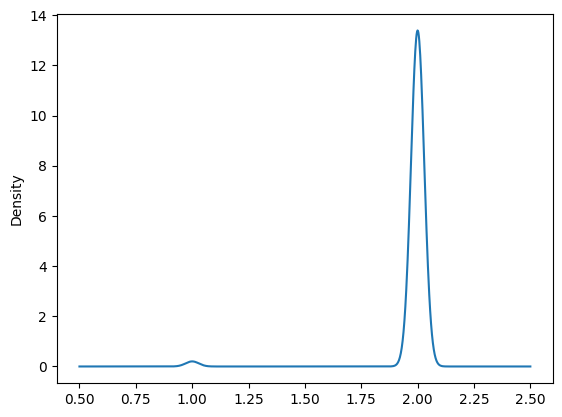

In [49]:
dfpd[dfpd.skew().idxmin()].plot(kind = 'density')

In [50]:
# import seaborn as sns
# sns.pairplot(data=dfpd)

## Removing Outliers 

In [51]:
# Find and display duplicate rows in the DataFrame
duplicate_rows = dfpd[dfpd.duplicated()]
duplicate_rows
dfpd.shape

(1207, 22)

In [52]:
dfpd = dfpd.drop_duplicates()
dfpd.dtypes

Brand                   int64
RAM                     int64
Processor               int64
Battery                 int64
Rear Camera             int64
Front Camera            int64
Display               float64
Launch Date             int64
Operating System        int64
Fabrication             int64
Graphics                int64
Display Type            int64
Pixel Density           int64
Refresh Rate            int64
Quick Charging          int64
USB Type-C              int64
Internal Memory         int64
Expandable Memory       int64
Audio Jack              int64
SIM Slot(s)             int64
Fingerprint Sensor      int64
Price                   int64
dtype: object

In [53]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores for each column in the DataFrame
dfpd_zscore = dfpd.apply(zscore)

# Set the threshold for Z-score outlier removal
zscore_threshold = 3

# Filter the DataFrame to exclude rows with Z-score outliers
dfpd_filtered = dfpd[(dfpd_zscore < zscore_threshold).all(axis=1)]

# Print the updated DataFrame
print("DataFrame after removing rows based on Z-score:")
dfpd_filtered.shape


DataFrame after removing rows based on Z-score:


(969, 22)

In [54]:
dfpd_filtered.isnull().sum()

Brand                 0
RAM                   0
Processor             0
Battery               0
Rear Camera           0
Front Camera          0
Display               0
Launch Date           0
Operating System      0
Fabrication           0
Graphics              0
Display Type          0
Pixel Density         0
Refresh Rate          0
Quick Charging        0
USB Type-C            0
Internal Memory       0
Expandable Memory     0
Audio Jack            0
SIM Slot(s)           0
Fingerprint Sensor    0
Price                 0
dtype: int64

In [55]:
dfpd_filtered.to_csv("mobile-data-no-outliers.csv")

In [63]:
from sklearn import preprocessing

columns_to_scale = [col for col in dfpd_filtered.columns if col not in ['Brand', 'Processor', 'Operating System', 'Graphics', 'Display Type', 'Quick Charging', 'USB Type-C', 'Expandable Memory', 'Audio Jack', 'Fingerprint Sensor']]


# Perform Z-score scaling
scaler = preprocessing.MinMaxScaler()
dfpd_scaled = scaler.fit_transform(dfpd_filtered[columns_to_scale])

# Create a new DataFrame with the scaled values
dfpd_scaled = pd.DataFrame(dfpd_scaled, columns=columns_to_scale)

# Concatenate the scaled columns with the remaining columns from the original DataFrame
dfpd_scaled = pd.concat([dfpd_scaled, dfpd_filtered.drop(columns=columns_to_scale)], axis=1)
dfpd_scaled.dropna(inplace=True)
dfpd_scaled.to_csv('mobile-data-scaled.csv', index=False)

# Ensemble Models

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error

# Split the data into training and testing sets
X = dfpd_scaled.drop('Price', axis=1)
y = dfpd_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
ada_model = AdaBoostRegressor()
xgb_model = XGBRegressor()

# Fit the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
ada_preds = ada_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate the metrics
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_ev = explained_variance_score(y_test, rf_preds)
rf_msle = mean_squared_log_error(y_test, rf_preds)

gb_mse = mean_squared_error(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)
gb_ev = explained_variance_score(y_test, gb_preds)
gb_msle = mean_squared_log_error(y_test, gb_preds)

ada_mse = mean_squared_error(y_test, ada_preds)
ada_mae = mean_absolute_error(y_test, ada_preds)
ada_r2 = r2_score(y_test, ada_preds)
ada_ev = explained_variance_score(y_test, ada_preds)
ada_msle = mean_squared_log_error(y_test, ada_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_ev = explained_variance_score(y_test, xgb_preds)
xgb_msle = mean_squared_log_error(y_test, xgb_preds)

# Print the results
print("Random Forest:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R-squared:", rf_r2)
print("Explained Variance Score:", rf_ev)
print("Mean Squared Logarithmic Error:", rf_msle)

print("\nGradient Boosting:")
print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("R-squared:", gb_r2)
print("Explained Variance Score:", gb_ev)
print("Mean Squared Logarithmic Error:", gb_msle)

print("\nAdaBoost:")
print("MSE:", ada_mse)
print("MAE:", ada_mae)
print("R-squared:", ada_r2)
print("Explained Variance Score:", ada_ev)
print("Mean Squared Logarithmic Error:", ada_msle)

print("\nXGBoost:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R-squared:", xgb_r2)
print("Explained Variance Score:", xgb_ev)
print("Mean Squared Logarithmic Error:", xgb_msle)

# model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# model.fit(X_train, y_train)
# custom_values = [[16, 5000, 108, 16, 6.7, 2022, 6, 400, 120, 128, 2, 36, 7, 0, 0, 1, 1, 1,1,1,1 ]]  # Replace value1, value2, value3, ... with your own values
# predictions = model.predict(custom_values)

Random Forest:
MSE: 0.003491467895322999
MAE: 0.039080942861902376
R-squared: 0.8281404362675588
Explained Variance Score: 0.8300473004066797
Mean Squared Logarithmic Error: 0.0020819584475125644

Gradient Boosting:
MSE: 0.0034955789163290864
MAE: 0.038330268993294184
R-squared: 0.8279380806114901
Explained Variance Score: 0.832553285038452
Mean Squared Logarithmic Error: 0.00213405333366306

AdaBoost:
MSE: 0.006781640279561292
MAE: 0.07235904275089135
R-squared: 0.6661891861022159
Explained Variance Score: 0.8029071683864335
Mean Squared Logarithmic Error: 0.00478441289085562

XGBoost:
MSE: 0.0031279225954126285
MAE: 0.03644026317699346
R-squared: 0.8460351265562106
Explained Variance Score: 0.8482136407439587
Mean Squared Logarithmic Error: 0.001843180456767777


## K-Fold

In [58]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import pandas as pd

# Define the models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# Define the range of k values to try
k_values = range(2, 11)  # Try k = 2 to 10

# Initialize the metrics dictionary to store the results
metrics = {
    'Model': [],
    'K': [],
    'MSE': [],
    'MAE': [],
    'R-squared': []
}

for model_name, model in models.items():
    for k in k_values:
        mse_scores = []
        mae_scores = []
        r2_scores = []

        # Perform k-fold cross-validation
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Calculate the evaluation metrics
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            mse_scores.append(mse)
            mae_scores.append(mae)
            r2_scores.append(r2)

        # Calculate the average scores across all folds
        avg_mse = np.mean(mse_scores)
        avg_mae = np.mean(mae_scores)
        avg_r2 = np.mean(r2_scores)

        # Store the results in the metrics dictionary
        metrics['Model'].append(model_name)
        metrics['K'].append(k)
        metrics['MSE'].append(avg_mse)
        metrics['MAE'].append(avg_mae)
        metrics['R-squared'].append(avg_r2)

# Convert metrics dictionary to a DataFrame for easier analysis
metrics_df = pd.DataFrame(metrics)

# Find the best k for each model based on the lowest MSE
best_k_values = metrics_df.groupby('Model')['MSE'].idxmin()
best_k_metrics = metrics_df.loc[best_k_values]

# Print the best k values and corresponding metrics for each model
for _, row in best_k_metrics.iterrows():
    print(row['Model'])
    print("Best K:", row['K'])
    print("MSE:", row['MSE'])
    print("MAE:", row['MAE'])
    print("R-squared:", row['R-squared'])
    print()


AdaBoost
Best K: 2
MSE: 0.007717634768396753
MAE: 0.06873160800016431
R-squared: 0.6699109366938623

Gradient Boosting
Best K: 8
MSE: 0.0042662428210453116
MAE: 0.039953224834367626
R-squared: 0.8163529318491648

Random Forest
Best K: 4
MSE: 0.004770252522783781
MAE: 0.041980721577866004
R-squared: 0.7945800749574755

XGBoost
Best K: 5
MSE: 0.004502979283388829
MAE: 0.04030927987240277
R-squared: 0.8067579663482427



In [64]:
df1 = pd.read_csv('/content/mobile-data-scaled.csv')

In [72]:
df1.head()

,RAM,Battery,Rear Camera,Front Camera,Display,Launch Date,Fabrication,Pixel Density,Refresh Rate,Internal Memory,...,Brand,Processor,Operating System,Graphics,Display Type,Quick Charging,USB Type-C,Expandable Memory,Audio Jack,Fingerprint Sensor
0,0.666667,0.636364,1.000000,0.4,0.755556,1.000000,0.111111,0.557789,0.714286,0.492063,...,36.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.500000,0.636364,1.000000,0.4,0.750000,0.909091,0.111111,0.562814,0.714286,0.492063,...,52.0,3.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.333333,0.636364,0.436893,0.2,0.761111,1.000000,0.444444,0.552764,0.357143,0.238095,...,52.0,7.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.666667,0.636364,0.436893,0.4,0.761111,1.000000,0.000000,0.706030,0.714286,0.492063,...,36.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.666667,0.636364,0.572816,0.4,0.741667,1.000000,0.000000,0.565327,0.714286,1.000000,...,38.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [73]:
df1.columns

Index(['RAM', 'Battery', 'Rear Camera', 'Front Camera', 'Display',
       'Launch Date', 'Fabrication', 'Pixel Density', 'Refresh Rate',
       'Internal Memory', 'SIM Slot(s)', 'Price', 'Brand', 'Processor',
       'Operating System', 'Graphics', 'Display Type', 'Quick Charging',
       'USB Type-C', 'Expandable Memory', 'Audio Jack', 'Fingerprint Sensor'],
      dtype='object')

In [75]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
X = dfpd_scaled.drop('Price', axis=1)
y = dfpd_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns = [col.strip() for col in X_train.columns]
model.fit(X_train, y_train)
own_values = np.array([[0.6666666666666666,	0.6363636363636364,	1.0,	0.4,	0.7555555555555555,	1.0,	0.1111111111111111,	0.5577889447236182,	0.7142857142857142,	0.492063492063492,	1.0,	0.160919540229885,	36.0,	4.0,	0.0,	0.0,	1.0,	1.0,	1.0,	1.0,	1.0,]])  # Replace value1, value2, value3, ... with your own values
predictions = model.predict(own_values)
print("Predictions:", predictions)

Predictions: [0.19571173]
